In [1]:
import math
import numpy as np
import meep as mp
from meep import mpb
import random
#from easydl import clear_output
import matplotlib.pyplot as plt
import csv

In [2]:
# initial parameters
nH = 2.826959#介质折射率
nL = 1   #背景折射率

datagroup = [0.65181721, 1.860254, 0.869471, 1.6847954, 0.4810127, 0.8054, 0.6902] 

#0.6495602, 1.8279283, 0.859331, 1.6848894, 0.50072795, 0.8029415, 0.68577605 FBW-A

#0.6933277, 1.8508, 0.8256799, 1.6767842, 0.49258208, 0.82101965, 0.6776 #Fig3. ng=51.9

#0.8683822, 1.7964348, 0.8091208, 1.6509471, 0.48580202,0.819374, 0.6711 #Fig3. ng=41.3
 
##0.65181721, 1.860254, 0.869471, 1.6847954, 0.4810127, 0.8054, 0.6902  #Fig3. ng=30.76

w_width=datagroup[0]#按位置读取列表
h1=datagroup[1]
h2=datagroup[2]
h3=datagroup[3]
w1=datagroup[4]
w2=datagroup[5]
w3=datagroup[6]

epsH = nH*nH
epsL = nL*nL
mat_si = mp.Medium(epsilon=epsH)

num_bands = 12                     #能带数
resolution = 16                    #分辨率
meshsize = 7                       #网格大小

#geometry_lattice = mp.Lattice(size=mp.Vector3(1, w_width+2*(h3+h2+h1)+pad)) #格结构
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 40)) #格结构
# set K-points######扫描的点，从晶体结构中心Gamma沿着x方向扫描到K点
k_points = [
    mp.Vector3(0.36,0),               # Gamma
    mp.Vector3(0.5,0),          # K
    #mp.Vector3(),                # Gamma
]
k_points = mp.interpolate(98, k_points)   ###采样点-2，为了曲线更清晰，取100点而不是37点

#二维
geometry = [mp.Block(size=mp.Vector3(1,10),center=mp.Vector3(), material=mp.air)]

geometry.append(mp.Block(size=mp.Vector3(w3,h3),center=mp.Vector3(0,-(w_width+h3)/2), material=mp.Medium(index=2.83)))
geometry.append(mp.Block(size=mp.Vector3(w2,h2),center=mp.Vector3(0,-(w_width+2*h3+h2)/2), material=mp.Medium(index=2.83)))
geometry.append(mp.Block(size=mp.Vector3(w1,h1),center=mp.Vector3(0,-(w_width+2*h3+2*h2+h1)/2), material=mp.Medium(index=2.83)))
geometry.append(mp.Block(size=mp.Vector3(1,w_width),center=mp.Vector3(), material=mp.Medium(index=2.83)))#波导
geometry.append(mp.Block(size=mp.Vector3(w3,h3),center=mp.Vector3(0,(w_width+h3)/2), material=mp.Medium(index=2.83)))
geometry.append(mp.Block(size=mp.Vector3(w2,h2),center=mp.Vector3(0,(w_width+2*h3+h2)/2), material=mp.Medium(index=2.83)))
geometry.append(mp.Block(size=mp.Vector3(w1,h1),center=mp.Vector3(0,(w_width+2*h3+2*h2+h1)/2), material=mp.Medium(index=2.83)))

ms = mpb.ModeSolver(
geometry=geometry,
geometry_lattice=geometry_lattice,
k_points=k_points,
resolution=resolution,
num_bands=num_bands)

ms.run_te()
te_freqs_w76 = ms.all_freqs
te_gaps = ms.gap_list
    
md = mpb.MPBData(rectify=True, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

Initializing eigensolver data
Computing 12 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 16 x 640 x 1.
Solving for 6 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 40, 0)
     (0, 0, 1)
Cell volume = 40
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.025, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,-1.16831,0)
          size (0.6902,1.6848,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,-2.44544,0)
          size (0.8054,0.869471,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,-3.8103,0)
          size (0.481013,1.86025,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)
          size (1,0.651817,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,1.16831,0)
          size (0.6902,1.6848,0)
          axes (1,0,0

    linmin: converged after 7 iterations.
    iteration    2: trace = 0.6699008737013508 (101.596% change)
    linmin: converged after 5 iterations.
    iteration    3: trace = 0.5543037525259426 (18.8853% change)
    linmin: converged after 5 iterations.
    iteration    4: trace = 0.494444797110982 (11.4153% change)
    linmin: converged after 5 iterations.
    iteration    5: trace = 0.4706764103260071 (4.92547% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 0.4615385044113425 (1.96047% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 0.4566809776255573 (1.05803% change)
    linmin: converged after 3 iterations.
    iteration    8: trace = 0.4532304422121833 (0.758433% change)
    linmin: converged after 4 iterations.
    iteration    9: trace = 0.4511599364223579 (0.457879% change)
    linmin: converged after 3 iterations.
    iteration   10: trace = 0.4498921354127614 (0.281405% change)
    linmin: converged after 4 itera

Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5.5 mean iterations/band.
tefreqs:, 9, 0.371313, 0, 0, 0.371313, 0.151864, 0.162597, 0.183081, 0.196553, 0.216281, 0.232191, 0.245898, 0.264939, 0.270825, 0.275823, 0.28237, 0.289537
elapsed time for k point: 0.48223876953125
solve_kpoint (0.372727,0,0):
Solving for bands 1 to 6...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.2233521260000177 (0.00181408% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.2233514876077463 (0.000285824% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.2233513065853161 (8.10483e-05% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2233512527404984 (2.41077e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.2233512387063045 (6.28346e-06% change)
Finished solving for bands 1 to 6 after 5 iterations.
Solving for bands 7 to 12...
   

    linmin: converged after 2 iterations.
    iteration    6: trace = 0.44232225809354 (5.83586e-06% change)
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 5.5 mean iterations/band.
tefreqs:, 14, 0.378384, 0, 0, 0.378384, 0.154384, 0.16503, 0.185423, 0.19888, 0.218261, 0.233961, 0.246248, 0.263662, 0.271547, 0.274238, 0.280413, 0.290845
elapsed time for k point: 0.481919527053833
solve_kpoint (0.379798,0,0):
Solving for bands 1 to 6...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.2283860501697786 (0.00188027% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.2283852988642547 (0.000328964% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.2283850653618468 (0.000102241% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2283849923558312 (3.19662e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.228384971675661

    linmin: converged after 3 iterations.
    iteration    2: trace = 0.4409757097311894 (0.000302266% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.4409752086230242 (0.000113636% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.4409750288005925 (4.07784e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.4409749267355132 (2.31453e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.4409748940233597 (7.41814e-06% change)
Finished solving for bands 7 to 12 after 6 iterations.
Finished k-point with 6 mean iterations/band.
tefreqs:, 19, 0.385455, 0, 0, 0.385455, 0.156877, 0.167436, 0.187752, 0.201184, 0.220191, 0.235656, 0.246244, 0.26267, 0.270751, 0.274121, 0.278496, 0.29212
elapsed time for k point: 0.5469672679901123
solve_kpoint (0.386869,0,0):
Solving for bands 1 to 6...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.2333858009129

    linmin: converged after 2 iterations.
    iteration    3: trace = 0.237341436920622 (0.000152539% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2373413015830443 (5.70223e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.2373412559601745 (1.92225e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.2373412415336761 (6.07838e-06% change)
Finished solving for bands 1 to 6 after 6 iterations.
Solving for bands 7 to 12...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.4396090592563719 (0.000706043% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 0.4396075799255977 (0.000336511% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.4396070142729334 (0.000128672% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.4396067917382259 (5.06213e-05% change)
    linmin: converged after 2 

    iteration    3: trace = 0.438498305529345 (0.000144663% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.4384980492337018 (5.84485e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.4384978911554965 (3.60499e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.4384978410679823 (1.14225e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.4384978235016953 (4.00601e-06% change)
Finished solving for bands 7 to 12 after 7 iterations.
Finished k-point with 6.5 mean iterations/band.
tefreqs:, 28, 0.398182, 0, 0, 0.398182, 0.161284, 0.171682, 0.1919, 0.205259, 0.223481, 0.238438, 0.245309, 0.261615, 0.267623, 0.275254, 0.275483, 0.294281
elapsed time for k point: 0.5709843635559082
solve_kpoint (0.399596,0,0):
Solving for bands 1 to 6...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.2422067207305875 (0.00216645% change)
    linmin: conv

    linmin: converged after 2 iterations.
    iteration    7: trace = 0.4373789146497569 (5.34474e-06% change)
Finished solving for bands 7 to 12 after 7 iterations.
Finished k-point with 7 mean iterations/band.
tefreqs:, 32, 0.403838, 0, 0, 0.403838, 0.163204, 0.173527, 0.193721, 0.207035, 0.224836, 0.239525, 0.244572, 0.261366, 0.266242, 0.27395, 0.276031, 0.295169
elapsed time for k point: 0.554356575012207
solve_kpoint (0.405253,0,0):
Solving for bands 1 to 6...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.2460044573326762 (0.002283% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.2460028899799828 (0.000637126% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.2460022725282315 (0.000250994% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2460020135081514 (0.000105292% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.2460019118637385

tefreqs:, 40, 0.415152, 0, 0, 0.415152, 0.166951, 0.177119, 0.197315, 0.210502, 0.227235, 0.241307, 0.242787, 0.260959, 0.263768, 0.271734, 0.27678, 0.296775
elapsed time for k point: 0.6487152576446533
solve_kpoint (0.416566,0,0):
Solving for bands 1 to 6...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.253224120620459 (0.00256226% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.2532218463528679 (0.000898128% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.2532208469079982 (0.000394692% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2532203835703218 (0.000182978% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.2532201646831094 (8.64414e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.2532200857915151 (3.11553e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.2532

    linmin: converged after 3 iterations.
    iteration   63: trace = 0.4346606707859443 (0.000715594% change)
    linmin: converged after 3 iterations.
    iteration   64: trace = 0.4346576113296013 (0.000703875% change)
    linmin: converged after 3 iterations.
    iteration   65: trace = 0.4346546068378093 (0.000691234% change)
    linmin: converged after 3 iterations.
    iteration   66: trace = 0.4346516602318256 (0.000677921% change)
    linmin: converged after 3 iterations.
    iteration   67: trace = 0.4346487734208979 (0.000664169% change)
    linmin: converged after 3 iterations.
    iteration   68: trace = 0.4346459473989263 (0.000650187% change)
    linmin: converged after 3 iterations.
    iteration   69: trace = 0.4346431823555664 (0.000636162% change)
    resetting CG direction...
    large trace change predicted (0.360206%)
    linmin: converged after 4 iterations.
    iteration   70: trace = 0.4330783949323349 (0.360666% change)
    linmin: converged after 3 iterations

    iteration    5: trace = 0.4301515869599281 (8.40394e-06% change)
Finished solving for bands 7 to 12 after 5 iterations.
Finished k-point with 6.5 mean iterations/band.
tefreqs:, 44, 0.420808, 0, 0, 0.420808, 0.168771, 0.178856, 0.199081, 0.212185, 0.228208, 0.241951, 0.24187, 0.260681, 0.262728, 0.270875, 0.276957, 0.290845
elapsed time for k point: 0.5602867603302002
solve_kpoint (0.422222,0,0):
Solving for bands 1 to 6...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.2565685144285855 (0.00271532% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.2565657932702569 (0.0010606% change)
    linmin: converged after 3 iterations.
    iteration    3: trace = 0.256564550754715 (0.000484288% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2565639392948401 (0.000238326% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.2565636237356563 (0.000122994% change)
    linmin: conve

Solving for bands 1 to 6...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.2624910501697896 (0.00295169% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.2624875375845121 (0.00133818% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.262485870231944 (0.000635214% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2624849642342381 (0.000345161% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.26248443180116 (0.000202843% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.2624842086680465 (8.50082e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.2624840796495582 (4.91529e-05% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 0.2624840223262933 (2.18388e-05% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 0.262484001165643 (

    linmin: converged after 2 iterations.
    iteration    3: trace = 0.2649810800250587 (0.000631704% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2649801616031967 (0.0003466% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.2649795963120475 (0.000213334% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.2649793496604972 (9.30833e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.2649792011754328 (5.60365e-05% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 0.2649791360051122 (2.45945e-05% change)
    linmin: converged after 1 iterations.
    iteration    9: trace = 0.2649791125049313 (8.86869e-06% change)
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 57.1429%)
    iteration    1: trace

    linmin: converged after 2 iterations.
    iteration    5: trace = 0.2671484150579262 (0.000183601% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.2671481941805604 (8.26797e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.2671480613302302 (4.97291e-05% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 0.267148002510564 (2.20176e-05% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 0.2671479822384715 (7.58834e-06% change)
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.4245799534910175 (0.000948811% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.4245780537425485 (0.000447443% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.4245775164071212 (0.000126558% change)
    linmin: converged after 2 

    linmin: converged after 2 iterations.
    iteration    7: trace = 0.269017382956514 (3.59298e-05% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 0.2690173383208096 (1.65921e-05% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 0.2690173234038691 (5.54497e-06% change)
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.4238403390193367 (0.000990965% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.423838363182298 (0.000466176% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.4238378142366519 (0.000129518% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.4238377148153249 (2.34574e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.4238376800048949 (8.21315e-06% change)
Finished solving for bands 7 to

    linmin: converged after 2 iterations.
    iteration    9: trace = 0.2706288207726067 (5.42356e-06% change)
Finished solving for bands 1 to 6 after 9 iterations.
Solving for bands 7 to 12...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.4232474840646464 (0.00102204% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.4232454553076276 (0.000479332% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.4232449031280532 (0.000130463% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.4232448029275299 (2.36744e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.4232447669518433 (8.49997e-06% change)
Finished solving for bands 7 to 12 after 5 iterations.
Finished k-point with 7 mean iterations/band.
tefreqs:, 69, 0.456162, 0, 0, 0.456162, 0.178841, 0.188346, 0.209387, 0.221502, 0.227879, 0.241529, 0.239672, 0.257465, 0.259604, 0.268727, 0.276339, 0

    iteration   29: trace = 0.271653957382371 (0.000510836% change)
    linmin: converged after 3 iterations.
    iteration   30: trace = 0.2716525609623503 (0.000514045% change)
    linmin: converged after 3 iterations.
    iteration   31: trace = 0.2716511533220641 (0.000518178% change)
    linmin: converged after 3 iterations.
    iteration   32: trace = 0.271649731279874 (0.000523482% change)
    linmin: converged after 3 iterations.
    iteration   33: trace = 0.2716482915845709 (0.000529984% change)
    linmin: converged after 3 iterations.
    iteration   34: trace = 0.2716468315394994 (0.000537478% change)
    linmin: converged after 3 iterations.
    iteration   35: trace = 0.2716453495818197 (0.000545547% change)
    linmin: converged after 3 iterations.
    iteration   36: trace = 0.2716438457616085 (0.000553598% change)
    linmin: converged after 3 iterations.
    iteration   37: trace = 0.2716423220705883 (0.000560917% change)
    linmin: converged after 3 iterations.
   

    linmin: converged after 2 iterations.
    iteration    3: trace = 0.2714240820895253 (0.000312236% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2714237493589648 (0.000122587% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.271423588765326 (5.91671e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.2714235255445891 (2.32923e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.2714235054083108 (7.41877e-06% change)
Finished solving for bands 1 to 6 after 7 iterations.
Solving for bands 7 to 12...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.4233536517093967 (0.000979912% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.4233516086541792 (0.000482589% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.4233510936493649 (0.00012165% change)
    linmin: converged after 2 i

    iteration    5: trace = 0.4226483766837462 (7.32082e-06% change)
Finished solving for bands 7 to 12 after 5 iterations.
Finished k-point with 6 mean iterations/band.
tefreqs:, 77, 0.467475, 0, 0, 0.467475, 0.181315, 0.190624, 0.212256, 0.223791, 0.226014, 0.239739, 0.240394, 0.256828, 0.259232, 0.268407, 0.276309, 0.288633
elapsed time for k point: 0.5112180709838867
solve_kpoint (0.468889,0,0):
Solving for bands 1 to 6...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.2732450747355637 (0.00275271% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.2732423442825326 (0.000999274% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.273241443761148 (0.000329569% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.273241075396071 (0.000134813% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.2732408966796023 (6.54062e-05% change)
    linmin: conve

    iteration    7: trace = 0.274443410727669 (8.2864e-06% change)
Finished solving for bands 1 to 6 after 7 iterations.
Solving for bands 7 to 12...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.4219097595686447 (0.000982581% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.4219077957465275 (0.000465461% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.4219073054036128 (0.00011622% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.4219072254636942 (1.89473e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.4219071976411332 (6.59447e-06% change)
Finished solving for bands 7 to 12 after 5 iterations.
Finished k-point with 6 mean iterations/band.
tefreqs:, 82, 0.474545, 0, 0, 0.474545, 0.182579, 0.191776, 0.213882, 0.224807, 0.224961, 0.239665, 0.239708, 0.256666, 0.259002, 0.268192, 0.276417, 0.288366
elapsed time for k point: 0.49807786

    iteration    1: trace = 0.2756230974305308 (0.00284036% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.2756201769821692 (0.00105959% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.2756192531381851 (0.000335188% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2756188988006734 (0.000128561% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.2756187361126298 (5.90265e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.2756186758079102 (2.18798e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.27561865476903 (7.63333e-06% change)
Finished solving for bands 1 to 6 after 7 iterations.
Solving for bands 7 to 12...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.4213358491102639 (0.000989577% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.421

    linmin: converged after 2 iterations.
    iteration    4: trace = 0.4210023100726242 (1.51052e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.421002291128138 (4.49985e-06% change)
Finished solving for bands 7 to 12 after 5 iterations.
Finished k-point with 6 mean iterations/band.
tefreqs:, 91, 0.487273, 0, 0, 0.487273, 0.18417, 0.193212, 0.216335, 0.22284, 0.226437, 0.239392, 0.238766, 0.256671, 0.258639, 0.267844, 0.276709, 0.287942
elapsed time for k point: 0.4973413944244385
solve_kpoint (0.488687,0,0):
Solving for bands 1 to 6...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.2764253742508271 (0.00286536% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.2764224046363454 (0.0010743% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.276421481922566 (0.000333806% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.2764211400476227 (

    iteration    6: trace = 0.276790659170305 (1.92727e-05% change)
    switching back to exact line minimization
    iteration    7: trace = 0.276790640815338 (6.63135e-06% change)
Finished solving for bands 1 to 6 after 7 iterations.
Solving for bands 7 to 12...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.4207575065419635 (0.000992793% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.4207556023236509 (0.00045257% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.4207551820050813 (9.98962e-05% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.420755124843797 (1.35854e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.4207551096669089 (3.60706e-06% change)
Finished solving for bands 7 to 12 after 5 iterations.
Finished k-point with 6 mean iterations/band.
tefreqs:, 96, 0.494343, 0, 0, 0.494343, 0.184615, 0.193611, 0.217249, 0.222062, 0

real part range: 1 .. 8.0089


In [3]:
te_freqs_w76
np.set_printoptions(threshold=np.inf)
te_freqs_w76

array([[0.14778667, 0.15865559, 0.17930942, 0.19279187, 0.21303522,
        0.22924357, 0.24474719, 0.26743351, 0.26883097, 0.27908175,
        0.28541394, 0.28751913],
       [0.14829917, 0.15915103, 0.17978226, 0.19326436, 0.21344501,
        0.22961825, 0.24492359, 0.26709916, 0.26910162, 0.27866191,
        0.28506513, 0.287741  ],
       [0.14881092, 0.15964572, 0.18025472, 0.19373623, 0.21385374,
        0.22999134, 0.24509166, 0.26677005, 0.26936772, 0.27824385,
        0.28469682, 0.28798197],
       [0.14932189, 0.16013964, 0.18072679, 0.19420748, 0.21426137,
        0.23036275, 0.24525092, 0.26644679, 0.26962876, 0.27782824,
        0.28431804, 0.28823298],
       [0.14983206, 0.16063276, 0.18119847, 0.19467808, 0.21466783,
        0.23073238, 0.24540089, 0.26612996, 0.26988407, 0.27741585,
        0.28393321, 0.28848964],
       [0.15034142, 0.16112505, 0.18166973, 0.195148  , 0.21507305,
        0.23110015, 0.24554107, 0.26582016, 0.27013277, 0.27700766,
        0.28354473,

In [4]:
data=[]
for i in range(12):
    data.insert(i,te_freqs_w76[:,i])
data=np.array(data)
data=data[8,:]
data

array([0.26883097, 0.26910162, 0.26936772, 0.26962876, 0.26988407,
       0.27013277, 0.27037367, 0.27060513, 0.27082479, 0.27102922,
       0.27121331, 0.27136929, 0.27148577, 0.27154726, 0.27153688,
       0.27144389, 0.27127127, 0.27103418, 0.27075111, 0.27043755,
       0.27010448, 0.26975925, 0.26940674, 0.26905026, 0.26869213,
       0.26833403, 0.26797722, 0.2676227 , 0.26727128, 0.26692365,
       0.26658041, 0.26624211, 0.26590923, 0.26558226, 0.26526162,
       0.26494777, 0.2646411 , 0.26434203, 0.26405094, 0.26376822,
       0.26349422, 0.26322929, 0.26297375, 0.26272791, 0.26249202,
       0.26226632, 0.262051  , 0.26184619, 0.26165199, 0.26146842,
       0.26129546, 0.261133  , 0.26098089, 0.26083889, 0.2607067 ,
       0.26058396, 0.26047025, 0.26036508, 0.26026793, 0.26017823,
       0.26009537, 0.26001873, 0.25994769, 0.2598816 , 0.25981983,
       0.25976178, 0.25970686, 0.25965452, 0.25960424, 0.25955556,
       0.25950807, 0.2594614 , 0.25941527, 0.25936941, 0.25932

In [5]:
ddata = [i for i in data]#生成列表，绘图用
ddata

[0.26883097413111245,
 0.26910161536555594,
 0.2693677179248344,
 0.2696287608605384,
 0.2698840734980722,
 0.2701327741967297,
 0.2703736742904038,
 0.27060512716194307,
 0.27082478740202015,
 0.2710292236380756,
 0.2712133051473362,
 0.2713692941788725,
 0.271485770765145,
 0.27154726253577405,
 0.2715368849415221,
 0.271443890864983,
 0.2712712744804963,
 0.27103417905263655,
 0.27075111376148714,
 0.27043755275967546,
 0.2701044813010601,
 0.26975924857092215,
 0.26940673928648773,
 0.26905026314426883,
 0.26869213232077094,
 0.2683340296237848,
 0.2679772205357814,
 0.26762270034496066,
 0.2672712815914747,
 0.26692365221322856,
 0.2665804135736525,
 0.2662421070711033,
 0.2659092315814472,
 0.2655822554861337,
 0.2652616248997026,
 0.2649477689915131,
 0.2646411031992724,
 0.26434203074060164,
 0.2640509428716366,
 0.26376821832182135,
 0.2634942172599429,
 0.2632292873521279,
 0.2629737514268648,
 0.26272790637367405,
 0.26249201863413835,
 0.2622663211211407,
 0.262050997376947

(0.258, 0.28)

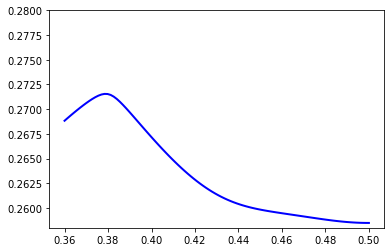

In [6]:
Xlabel = np.linspace(0.36,0.5,100)#色散曲线绘制
plt.plot(Xlabel,data, c='b', linewidth = 2) 
plt.ylim(0.258,0.28)
# plt.scatter(Xlabel,data,color='red',facecolors='none')
# plt.xlim(0.36,0.50)
# plt.ylim(0.255,0.270)

In [7]:
# XXlabel = [i for i in Xlabel]
# XXlabel

In [8]:
x = np.linspace(0.36,0.5,100)
y = data.T
diff_x = []                       # 存储x列表中的两数之差
for i in range(99):
    diff = x[i+1]-x[i]
    diff_x.append(diff)
#np.array(diff_x).shape
diff_y = []                       # 存储y列表中的两数之差
for i in range(99):
    diff = abs(y[i+1]-y[i])
    diff_y.append(diff)
slopes = []                       # 存储斜率
for i in range(len(diff_y)):
    slopes.append(diff_y[i] / diff_x[i])
#slopes
deriv = []                        # 存储一阶导数
for i, j in zip(slopes[0::], slopes[1::]):        
    deriv.append((0.5 * (i + j))) # 根据离散点导数的定义，计算并存储结果
deriv.insert(0, slopes[0])        # (左)端点的导数即为与其最近点的斜率
deriv.append(slopes[-1])          # (右)端点的导数即为与其最近点的斜率

Deriv_pre = [1/i for i in deriv]
Deriv_pre

[5.2251513596932915,
 5.269334944090853,
 5.365279330286232,
 5.477393824856013,
 5.611523793507678,
 5.776712114401874,
 5.987647027906991,
 6.26956467336797,
 6.668960926237832,
 7.279674770021,
 8.316753405499023,
 10.380329272471831,
 15.892054506339186,
 39.35310730750721,
 27.36032809220735,
 10.6482358313743,
 6.903102969096823,
 5.437324897716751,
 4.740459583579403,
 4.373864600634058,
 4.16963786333252,
 4.053479322176526,
 3.989197410775229,
 3.9578159239546733,
 3.9488277878580655,
 3.9561284170524007,
 3.976052880823681,
 4.0064128082074735,
 4.045905710776821,
 4.093810619860931,
 4.149809973648135,
 4.213883657679849,
 4.286240864925821,
 4.367284816555238,
 4.457593427538904,
 4.557911232309907,
 4.669150122230199,
 4.792397414466959,
 4.928932758713535,
 5.08020965602487,
 5.247950085131789,
 5.43413736028761,
 5.640985497703857,
 5.871061449389144,
 6.127324936748016,
 6.413030624181391,
 6.7319053906563315,
 7.088253735799453,
 7.4867928678981395,
 7.93279936155689,


# 分界线

(1575.0, 1625.0)

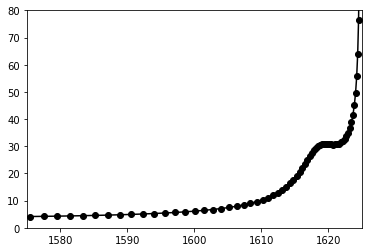

In [9]:
y = data.T#绘制群折射率曲线
Nglabel = [420/i for i in y]
#plt.plot(Nglabel,Deriv_pre, c='b', linewidth = 1.5) 
plt.plot(Nglabel,Deriv_pre, c='black', linewidth = 1.5) 
plt.scatter(Nglabel,Deriv_pre,color='black') #,facecolors='none'
plt.ylim(0,80)
#22.926089715784727,22.926089715784727/9*11
plt.xlim(1575,1625)
#24.2   1593.9,1599.1
#25 1593.4,1599.4
#23.82 1609.8,1617.6
#30.72  1617.5,1622.7

(0.4, 0.5)

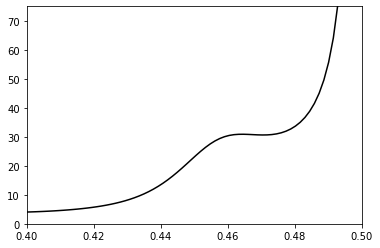

In [10]:
plt.plot(Xlabel,Deriv_pre, c='black', linewidth = 1.5)#绘制ng-k曲线
plt.ylim(0,75)
plt.xlim(0.4,0.5)

In [11]:
Nglabel#波长坐标，绘图用

[1562.319972084617,
 1560.7487135647962,
 1559.2068835702084,
 1557.6973267226451,
 1556.2237317534787,
 1554.7909773218648,
 1553.4056749507538,
 1552.0770223568302,
 1550.818165608083,
 1549.6483898018894,
 1548.5965917927058,
 1547.7064244533055,
 1547.0424060026726,
 1546.6920788592688,
 1546.7511903233726,
 1547.28109246308,
 1548.2656643403534,
 1549.6200570276908,
 1551.2401561900526,
 1553.0387541009636,
 1554.9538385180122,
 1556.9438387191317,
 1558.9810452119798,
 1561.046605536266,
 1563.1272727353037,
 1565.213329777282,
 1567.2973962498427,
 1569.3735974512917,
 1571.437071349745,
 1573.483640424972,
 1575.509597159357,
 1577.511553752216,
 1579.4863439006076,
 1581.4309552843174,
 1583.3424837037967,
 1585.2181039254328,
 1587.0550527585417,
 1588.8506221401667,
 1590.6021596907347,
 1592.3070742645787,
 1593.9628746602082,
 1595.5671354994638,
 1597.1175743629512,
 1598.612061417793,
 1600.0486498044593,
 1601.42559747884,
 1602.741467134549,
 1603.9950780601741,
 1605.

In [12]:
x = np.array(Nglabel) #按定义求解GVD
y = np.array(Deriv_pre)
data_deriv = []
#y = data.iloc[k,7:46]
diff_x = []                       
for i in range(99):
    diff = x[i+1]-x[i]
    diff_x.append(diff)
#np.array(diff_x).shape
diff_y = []                       
for i in range(99):
    diff = abs(y[i+1]-y[i])
    diff_y.append(diff)
slopes = []                       
for i in range(len(diff_y)):
    slopes.append(diff_y[i] / diff_x[i])
deriv = []                        
for i, j in zip(slopes[0::], slopes[1::]):        
    deriv.append((0.5 * (i + j))) 
deriv.insert(0, slopes[0])        
deriv.append(slopes[-1])          

GVD = []
for i in range(99):
    GV = -((x[i])**2/(2*3.14159*9*10**16))*deriv[i]*1000000000000
    GVD.append(GV)
GVD 

[0.12137556314440111,
 0.19459423783430493,
 0.2934133646124591,
 0.35462242422145357,
 0.441800333285236,
 0.5718921320209919,
 0.7775978757619381,
 1.1277198882900354,
 1.7848887169087122,
 3.202134967269927,
 7.006323045679259,
 22.490469520722847,
 159.2838396461574,
 -287.49059391978057,
 -495.8926745915775,
 -74.81285336888699,
 -10.356133546934721,
 -3.211135785322292,
 -1.348863455685242,
 -0.6620998536771235,
 -0.3527760896709608,
 -0.19274125072222859,
 -0.10045703894487724,
 -0.04204302136009242,
 -0.016893475220053543,
 -0.02829057213590454,
 -0.05252482912818169,
 -0.0735236512766154,
 -0.09289779691427746,
 -0.11175174243578971,
 -0.1309106178970601,
 -0.1510456531644969,
 -0.17275621993043125,
 -0.19662994921091784,
 -0.22328196929823663,
 -0.25338964169986933,
 -0.28772729879326914,
 -0.32720698217506583,
 -0.37287117192720776,
 -0.42602434030797404,
 -0.4883030774519053,
 -0.5615618065197993,
 -0.6481144985785076,
 -0.7509444907555815,
 -0.8734971346525058,
 -1.0200050

(1600.0, 1630.0)

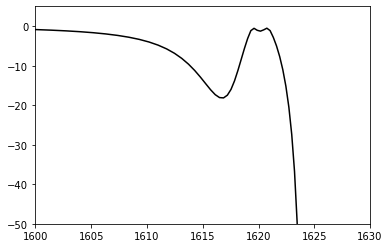

In [13]:
plt.plot(x[:99],GVD, c='black', linewidth = 1.5)#绘制GVD 曲线
plt.ylim(-50,5)
plt.xlim(1600,1630)
#1617.55,1622.75
#1612.8,1616.8